## Predirre se qualcuno ha o non ha il Covid-19

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Antonelli Giacomo

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Parte 1 - Descrizione del dataset e l'obiettivo del modello

Il [dataset scelto](https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download) contiene diverse informazioni riguardo la salute di numerosi pazienti che hanno contratto il virus del COVID-19, e del livello di rischio a cui ognuno di essi è sottoposto, ovvero quanto gravi sono stati gli effetti sul loro corpo. Il modello avrà lo scopo di definire questo livello di rischio per un paziente di cui si ha solamente le informazioni cliniche, applicato al mondo reale questo modello verrebbe usato per categorizzare i pazienti in fascie diverse, in modo da dare priorità a coloro che sono più a rischio.

Il dataset in sé contiene 1.048.576 righe (una per ogni paziente) e 21 caratteristiche elencate qui di seguito:
- sex: 1 per le femmine e 2 per i maschi.
- age: età del paziente.
- classification: risultati del test covid. I valori da 1 a 3 significano che il paziente è stato diagnosticato con covid in diversi gradi. 4 o superiore significa che il paziente non è portatore di covid o che il test è inconcludente.
- patient type: tipo di assistenza che il paziente ha ricevuto nell'unità. 1 per il ritorno a casa e 2 per l'ospedalizzazione.
- pneumonia: se il paziente ha già un'infiammazione degli alveoli o meno.
- pregnancy: se il paziente è incinta o meno.
- diabetes: se il paziente ha il diabete o meno.
- copd: indica se il paziente ha la broncopneumopatia cronica ostruttiva o meno.
- asthma: se il paziente ha l'asma o meno.
- inmsupr: se il paziente è immunosoppresso o meno.
- hypertension: se il paziente ha l'ipertensione o meno.
- cardiovascular: se il paziente ha malattie legate al cuore o ai vasi sanguigni.
- renal chronic: se il paziente ha una malattia renale cronica o meno.
- other disease: se il paziente ha altre malattie o meno.
- obesity: se il paziente è obeso o meno.
- tobacco: se il paziente è un consumatore di tabacco.
- usmr: indica se il paziente è stato trattato in unità mediche di primo, secondo o terzo livello.
- medical unit: tipo di istituzione del Sistema Sanitario Nazionale che ha fornito le cure.
- intubed: se il paziente è stato collegato al ventilatore.
- icu: indica se il paziente è stato ammesso in un'Unità di Terapia Intensiva.
- date died: se il paziente è deceduto, indica la data della morte, e 9999-99-99 altrimenti.

Non tutti i dati sono presenti all'interno del dataset (indicati dai valori tra 97 e 99), mentre i valori booleani sono rappresentati da 1=si e 2=no.

In [21]:
# Dopo aver scaricato il file, lo carichiamo in un DataFrame
data = pd.read_csv("Covid Data.csv")
initial_size = data.memory_usage(deep=True).sum()/1024**2

print(f"Forma dei dati: {data.shape}\n")

data.head()

Forma dei dati: (1048575, 21)



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


# Parte 2 - Analisi esplorativa
In questa parte andrò ad analizzare le varie feature e valori del dataset attraverso grafici e strumenti statistici per capirne la distribuzione ed eventuali relazioni o incongruenze

In [22]:
# Come da specifiche i dati assenti non sono rappresentati da NaN ma da numeri tra 97 e 99
print(f"Numero di NaN: {data.isna().sum().sum()}\n")

# Vado quindi a contare quanti sono i record con valori tra 97 e 99 per ogni colonna
print("Numero di record con feature tra 97 e 99:")
print(data.apply(lambda col: col.isin([97, 98, 99]).sum()))

Numero di NaN: 0

Numero di record con feature tra 97 e 99:
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64


Visualizzo graficamente il numero di valori validi e valori assenti per ogni colonna

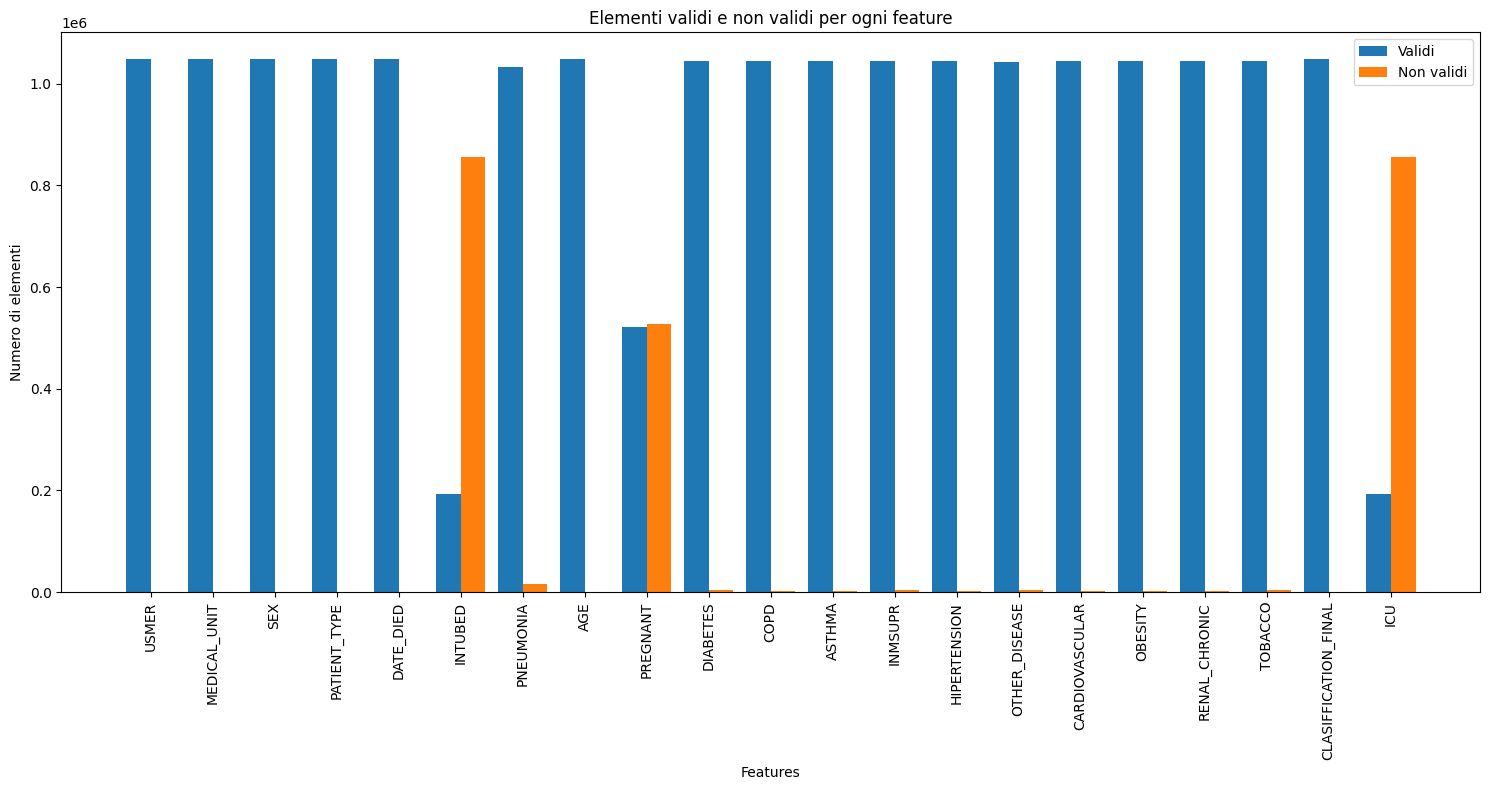

In [23]:
invalid_values = {97, 98, 99}

valid_counts = []
invalid_counts = []

for col in data.columns:
    valid_count = data[col].apply(lambda x: x not in invalid_values).sum()
    invalid_count = data[col].apply(lambda x: x in invalid_values).sum()
    valid_counts.append(valid_count)
    invalid_counts.append(invalid_count)

# Stampo il grafico dei dati ottenuti
x = np.arange(len(data.columns))
width = 0.4

# Definisco alcune proprietà del grafico
fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, valid_counts, width, label='Validi')
rects2 = ax.bar(x + width/2, invalid_counts, width, label='Non validi')

ax.set_xlabel('Features')
ax.set_ylabel('Numero di elementi')
ax.set_title('Elementi validi e non validi per ogni feature')
ax.set_xticks(x)
ax.set_xticklabels(data.columns, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()

Questa è la tabella che descrive le varie features del dataset:

In [24]:
print(data.describe())

              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  7.952288e+01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  3.686889e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  9.700000e+01   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  9.700000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  9.700000e+01   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  9.900000e+01   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.346831e+00  4.179410e+01  4.976558e+01  2.186404e+00  2.260569e+00   
std    1.191288e+01  1.690739e+01  4.751073e+01  5.

All'interno del dataset, essendo molti i dati e di diverso tipo, la tabella sopra elencata può risultare un po confusionaria o non dire molto, perciò mostrerò di seguito alcune delle relazioni tra le features che ritengo più interessanti:

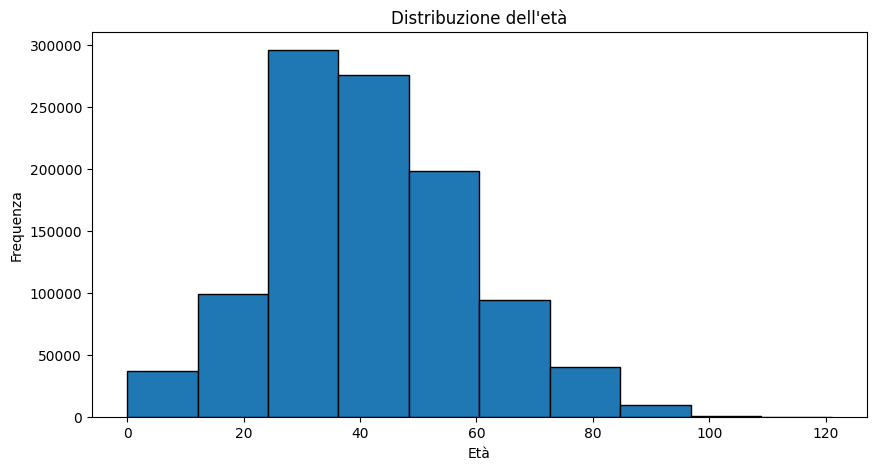

In [34]:
# Distribuzione dell'età
plt.figure(figsize=(10, 5))
data['AGE'].dropna().astype(int).plot(kind='hist', bins=10, edgecolor='k', title='Distribuzione dell\'età')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.show()

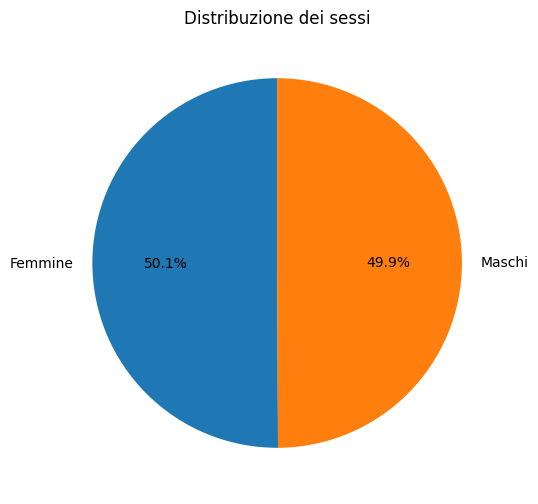

In [33]:
# Distribuzione dei sessi
plt.figure(figsize=(6, 6))
data['SEX'].value_counts().plot(kind='pie', labels=['Femmine', 'Maschi'], autopct='%1.1f%%', startangle=90, title='Distribuzione dei sessi')
plt.ylabel('')
plt.show()

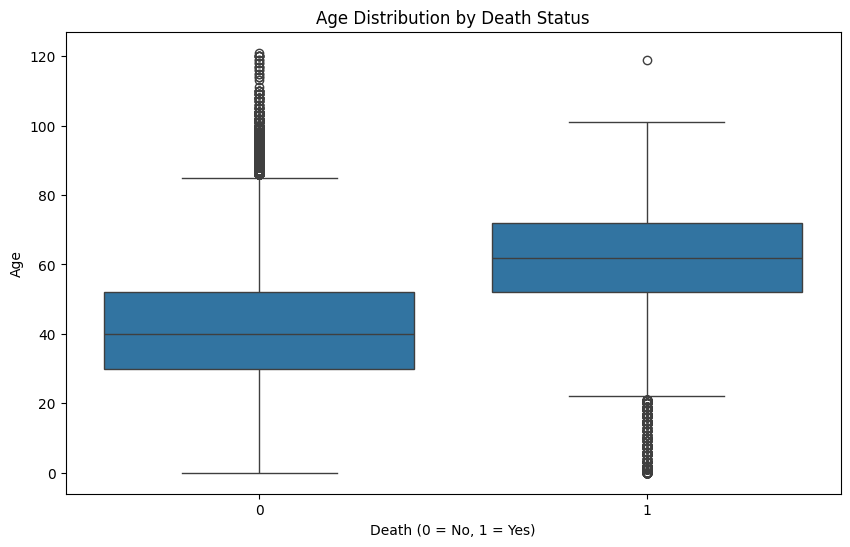

In [35]:
# Converto la colonna DATE_DIED in un formato datetime per poterla utilizzare nel grafico
data['DATE_DIED'] = pd.to_datetime(data['DATE_DIED'], errors='coerce')
data['DIED'] = data['DATE_DIED'].notna().astype(int)

# Boxplot per l'età in base alla morte
plt.figure(figsize=(10, 6))
sns.boxplot(x='DIED', y='AGE', data=data)
plt.title('Age Distribution by Death Status')
plt.xlabel('Death (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

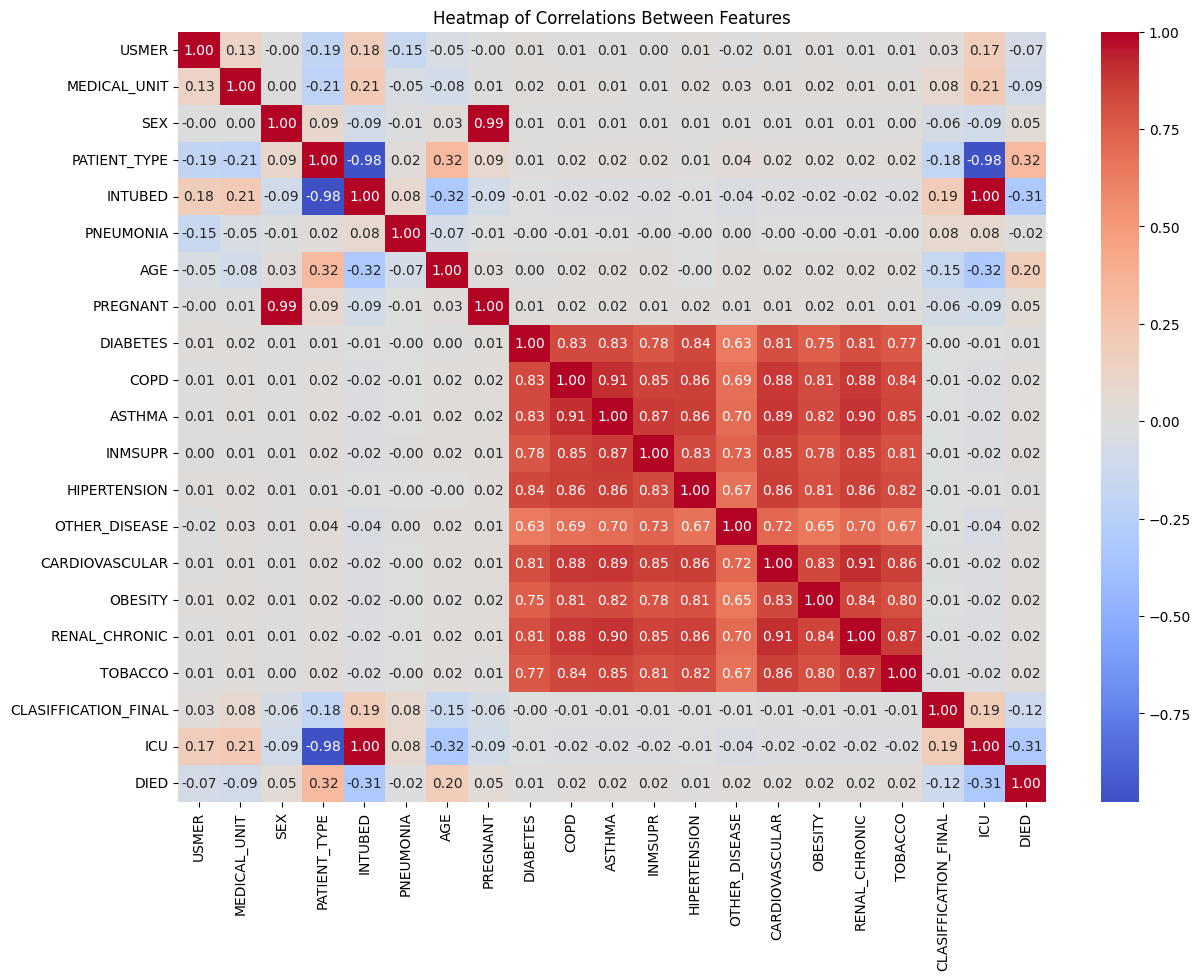

In [31]:
# Heatmap delle correlazioni tra le features
plt.figure(figsize=(14, 10))
correlation_matrix = data.drop(columns=['DATE_DIED']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Heatmap delle correlazioni tra le features')
plt.show()

# Parte 3 - Preparare i Dati
In questa parte andrò a modificare i dati all'interno del dataframe, eliminando dati superflui o incompleti e ad ottimizzare la memoria.

Siccome le colonne INTUBED e ICU hanno per la maggior parte dei record valori non disponibili le eliminiamo dal dataframe\
PROVA A FARE UN TEST SENZA TOGLIERLE DAL DATAFRAME!!!

In [61]:
print(data.INTUBED.value_counts())
print(data.ICU.value_counts())
data.drop(columns=["INTUBED","ICU"], inplace=True)

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64
ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64


Andiamo ora invece ad analizzare i valori dei dati, in modo da capire se possiamo risparmiare memoria cambiando il tipo di dato

In [62]:
for i in data.columns:
    print(i,": ",len(data[i].unique()))

USMER :  2
MEDICAL_UNIT :  13
SEX :  2
PATIENT_TYPE :  2
DATE_DIED :  401
PNEUMONIA :  3
AGE :  121
PREGNANT :  4
DIABETES :  3
COPD :  3
ASTHMA :  3
INMSUPR :  3
HIPERTENSION :  3
OTHER_DISEASE :  3
CARDIOVASCULAR :  3
OBESITY :  3
RENAL_CHRONIC :  3
TOBACCO :  3
CLASIFFICATION_FINAL :  7


Della feature DATE_DIED, non ci importa la data di decesso o meno della persona, quindi possiamo convertirlo in un binario 1=morto, 2=vivo

In [63]:
data["DATE_DIED"] = [2 if date=="9999-99-99" else 1 for date in data.DATE_DIED]

Riguardo alla feature PREGNANT, possiamo vedere che numerosi valori sono identificati come assenti:

In [64]:
print(data.PREGNANT.value_counts())

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64


In particolare, analizzando le feature mischiando PREGNANT e SEX, possiamo vedere come la maggior parte dei valori assenti ricadano tra i pazienti di sesso maschile, per questo motivo possiamo immetergli un valore PREGNANT uguale a 2 (False), mentre per i pochi valori assenti nei record con sesso femminile possiamo eliminarli siccome non sono un numero importante

In [65]:
male_pregnant = data.loc[data.SEX == 2, 'PREGNANT'].value_counts()
female_pregnant = data.loc[data.SEX == 1, 'PREGNANT'].value_counts()
print(f"Male pregnants:\n{male_pregnant}\n")
print(f"Female pregnants:\n{female_pregnant}\n")

# Elimino i pochi record con sesso femminile senza informazioni sulla gravidanza
data = data[~((data.SEX == 1) & (data.PREGNANT != 1) & (data.PREGNANT != 2))]

# Converto tutti i record con sesso maschile in 2 (non incinta)
data = data.replace({'PREGNANT': {97: 2, 98: 2, 99: 2}})

data.PREGNANT.value_counts()

Male pregnants:
PREGNANT
97    523511
Name: count, dtype: int64

Female pregnants:
PREGNANT
2     513179
1       8131
98      3754
Name: count, dtype: int64



PREGNANT
2    1036690
1       8131
Name: count, dtype: int64

Ora eliminiamo i record con valori tra 97 e 99, tranne per INTUBED, PNEUMONIA e PREGNANT DA FIXARE!!!

In [66]:
data = data[~data.isin([97, 98, 99]).any(axis=1)]
print(data.shape)
print("Numero di record con feature tra 97 e 99: ", data.apply(lambda col: col.isin([97, 98, 99]).sum()).sum())

(1021655, 19)
Numero di record con feature tra 97 e 99:  0


Dalla stampa precedente possiamo notare che la maggior parte delle colonne ha un numero di valori unici molto basso, possiamo quindi raccoglierli in gruppi di valori definiti

In [67]:
data['USMER'] = data['USMER'].astype('category')
data['MEDICAL_UNIT'] = data['MEDICAL_UNIT'].astype('category')
data['SEX'] = data['SEX'].astype('category')
data['DATE_DIED'] = data['DATE_DIED'].astype('category')
#data['INTUBED'] = data['INTUBED'].astype('category')
data['PNEUMONIA'] = data['PNEUMONIA'].astype('category')
data['PREGNANT'] = data['PREGNANT'].astype('category')
data['DIABETES'] = data['DIABETES'].astype('category')
data['COPD'] = data['COPD'].astype('category')
data['ASTHMA'] = data['ASTHMA'].astype('category')
data['INMSUPR'] = data['INMSUPR'].astype('category')
data['HIPERTENSION'] = data['HIPERTENSION'].astype('category')
data['OTHER_DISEASE'] = data['OTHER_DISEASE'].astype('category')
data['CARDIOVASCULAR'] = data['CARDIOVASCULAR'].astype('category')
data['OBESITY'] = data['OBESITY'].astype('category')
data['RENAL_CHRONIC'] = data['RENAL_CHRONIC'].astype('category')
data['TOBACCO'] = data['TOBACCO'].astype('category')
#data['ICU'] = data['ICU'].astype('category')

In [70]:
final_size = data.memory_usage(deep=True).sum()/1024**2

saved_memory = initial_size - final_size
saved_memory_percentage = (saved_memory / initial_size) * 100

print(f"Quantità di memoria risparmiata: {saved_memory:.2f} MB ({saved_memory_percentage:.2f}%)")

Quantità di memoria risparmiata: 172.23 MB (78.64%)
